In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from PIL import Image

In [84]:
#1 - 5 모델 준비하기
#1 - 6 손실함수 loss 정의하기
#1 - 7 기울기를 구하는 gradient 함수 구현하기

#칸을 추가해서 모델함수를 만들기
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#손실함수도 만들기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


#기울기 결정 그라디언트 함수도 만들기
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()

    return dW, db

In [85]:
#1 - 1 데이터 가져오기
#1 - 2 모델에 입력할 데이터 X 준비하기
#1 - 3 모델에 예측할 데이터 y 준비하기

#당뇨셋 불러오기
diabetes = load_diabetes()

df_X = load_diabetes().data
df_y = load_diabetes().target

#numpy array로 변환하랬는데
print(type(df_X))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [86]:
#이미 넘파이 어레이군요

#정보를 일단 알아보죠
print(diabetes.DESCR)
print()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [87]:
#DESCR에 나온대로 전체 갯수는 442
#그래도 조금 더 궁금함
df_X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [88]:
#1 - 4 train 데이터와 test 데이터로 분리하기

#데이터셋 쪼개기 트레인 8:2 테스트
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(df_X, df_y, test_size=0.2, random_state=7)
print(" Data for train : " , X_train_d.shape , " , ", y_train_d.shape)
print(" Data for test : " , X_test_d.shape, " , ", y_test_d.shape)
#353개 / 89개로 데이터셋을 쪼갬

#모델함수를 만들기 > 윗칸으로 이동해서 만들었어요

 Data for train :  (353, 10)  ,  (353,)
 Data for test :  (89, 10)  ,  (89,)


In [101]:
#1 - 5 모델 준비하기
#1 - 8 하이퍼 파라미터인 학습률 설정하기

#초기화
LEARNING_RATE = 0.0005
W = np.random.rand(10)
b = np.random.rand()


In [9]:
#1 - 9 모델 학습히기

losses = []

for i in range(1, 30001):
    dW, db = gradient(X_train_d, W, b, y_train_d)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train_d, W, b, y_train_d)
    losses.append(L)
    if i % 300 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 300 : Loss 18653.4819
Iteration 600 : Loss 12467.1637
Iteration 900 : Loss 8974.1411
Iteration 1200 : Loss 6973.3709
Iteration 1500 : Loss 5803.4473
Iteration 1800 : Loss 5099.4612
Iteration 2100 : Loss 4659.5306
Iteration 2400 : Loss 4371.5102
Iteration 2700 : Loss 4172.7306
Iteration 3000 : Loss 4027.8662
Iteration 3300 : Loss 3916.7574
Iteration 3600 : Loss 3827.6997
Iteration 3900 : Loss 3753.7389
Iteration 4200 : Loss 3690.6173
Iteration 4500 : Loss 3635.6322
Iteration 4800 : Loss 3586.9951
Iteration 5100 : Loss 3543.4703
Iteration 5400 : Loss 3504.1666
Iteration 5700 : Loss 3468.4167
Iteration 6000 : Loss 3435.7045
Iteration 6300 : Loss 3405.6201
Iteration 6600 : Loss 3377.8315
Iteration 6900 : Loss 3352.0654
Iteration 7200 : Loss 3328.0942
Iteration 7500 : Loss 3305.7263
Iteration 7800 : Loss 3284.7991
Iteration 8100 : Loss 3265.1738
Iteration 8400 : Loss 3246.7308
Iteration 8700 : Loss 3229.3669
Iteration 9000 : Loss 3212.9920
Iteration 9300 : Loss 3197.5272
Iteration

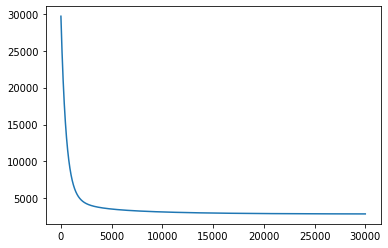

In [102]:
#학습과정 그래프로 나타내보기
plt.plot(losses)
plt.show()

In [103]:
#1 - 10 test 데이터에 대한 성능 확인하기

prediction = model(X_test_d, W, b)
mse = loss(X_test_d, W, b, y_test_d)
mse


25739.54360548175

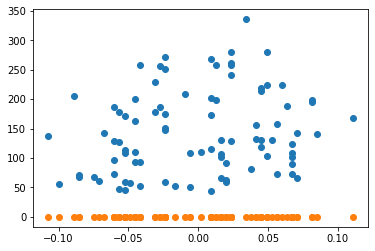

In [104]:
#1 - 11정답 데이터와 예측한 데이터 시각화하기

plt.scatter(X_test_d[:, 0], y_test_d, label = "true")
plt.scatter(X_test_d[:, 0], prediction, label = "pred")
plt.show()

In [108]:
#loss는 작게 나오는데
#mse도 크고
#시각화 했을때 prediction결과가 엉망임
#다시해보자
#"배우기 20배"

LEARNING_RATE2 = 0.01
W = np.random.rand(10)
b = np.random.rand()

In [109]:
losses2 = []

for i in range(1, 30001):
    dW, db = gradient(X_train_d, W, b, y_train_d)
    W -= LEARNING_RATE2 * dW
    b -= LEARNING_RATE2 * db
    L = loss(X_train_d, W, b, y_train_d)
    losses2.append(L)
    if i % 300 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 300 : Loss 3435.0174
Iteration 600 : Loss 3089.7060
Iteration 900 : Loss 2968.2265
Iteration 1200 : Loss 2919.1683
Iteration 1500 : Loss 2898.3277
Iteration 1800 : Loss 2889.0319
Iteration 2100 : Loss 2884.6474
Iteration 2400 : Loss 2882.4316
Iteration 2700 : Loss 2881.2095
Iteration 3000 : Loss 2880.4597
Iteration 3300 : Loss 2879.9431
Iteration 3600 : Loss 2879.5459
Iteration 3900 : Loss 2879.2125
Iteration 4200 : Loss 2878.9145
Iteration 4500 : Loss 2878.6373
Iteration 4800 : Loss 2878.3728
Iteration 5100 : Loss 2878.1168
Iteration 5400 : Loss 2877.8668
Iteration 5700 : Loss 2877.6213
Iteration 6000 : Loss 2877.3795
Iteration 6300 : Loss 2877.1410
Iteration 6600 : Loss 2876.9053
Iteration 6900 : Loss 2876.6723
Iteration 7200 : Loss 2876.4419
Iteration 7500 : Loss 2876.2138
Iteration 7800 : Loss 2875.9881
Iteration 8100 : Loss 2875.7646
Iteration 8400 : Loss 2875.5433
Iteration 8700 : Loss 2875.3242
Iteration 9000 : Loss 2875.1072
Iteration 9300 : Loss 2874.8922
Iteration 9

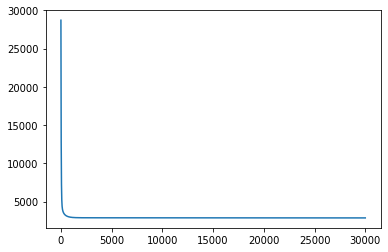

In [110]:
#학습과정 그래프로 나타내보기
plt.plot(losses2)
plt.show()

In [111]:
#learning rate가 크니까 로스가 가파르게 감소
#1 - 10 test 데이터에 대한 성능 확인하기

prediction = model(X_test_d, W, b)
mse = loss(X_test_d, W, b, y_test_d)
mse

#learning late가 20배일때는 mse가 2944.50
#기존은 25677.48728448198 히익
#이쪽이 적정치인것 같습니다
#MSE 3000 이하 달성 ㅠㅠ


2944.504877540642

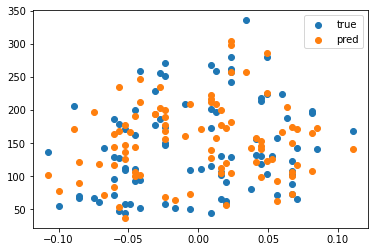

In [112]:
plt.scatter(X_test_d[:, 0], y_test_d, label = "true")
plt.scatter(X_test_d[:, 0], prediction, label = "pred")
plt.legend()
plt.show()

#이쪽이 적정치였네

In [113]:
#2 - 1 데이터 가져오기
#노드에 소개된 터미널에서 링크를 걸어주는 (심볼릭 링크) 작업 후에 진행

train_b = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train_b.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [114]:
#datetim 컬럼을 datetime 자료형으로 변환하고 연 월 일 시 분 초 까지 6가지 컬럼 생성하기
tmp_time = pd.to_datetime(train_b['datetime'])
tmp_time

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [115]:
#일단 변환을 하니 위처럼 나왔음
#멤버 year month 등을 써서 train_b에 재추가하고, datetime을 삭제하면되나요
tmp_time.values

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-19T21:00:00.000000000', '2012-12-19T22:00:00.000000000',
       '2012-12-19T23:00:00.000000000'], dtype='datetime64[ns]')

In [116]:
#https://steadiness-193.tistory.com/171 
#https://sarah0518.tistory.com/61 를 참고
#to_datetime 함수를 쓰고 바로 year등의 datetime object의 멤버로 접근하면 오류, dt를 중간에 써줘야함
#잘 나오나 테스트

tmp_time.dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [117]:
#잘 나왔으니, 요구사항에 맞추어 연월일시분초 6가지 컬럼 생성하기

train_b['year'] = tmp_time.dt.year
train_b['month'] = tmp_time.dt.month
train_b['day'] = tmp_time.dt.day
train_b['hour'] = tmp_time.dt.hour
train_b['minute'] = tmp_time.dt.minute
train_b['seconds'] = tmp_time.dt.second

print(train_b.head())

#datetime이 잘 쪼개진것까지 확인함 휴휴
#근데 datetime 따로 import안했는데 왜 되는거죠
#pandas에서 쓰기대문에 종속성이 있어서 이미 시스템상에서 쓰고있구나 짐작만할뿐..

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  seconds  
0       0        0  
1       0        0  
2    

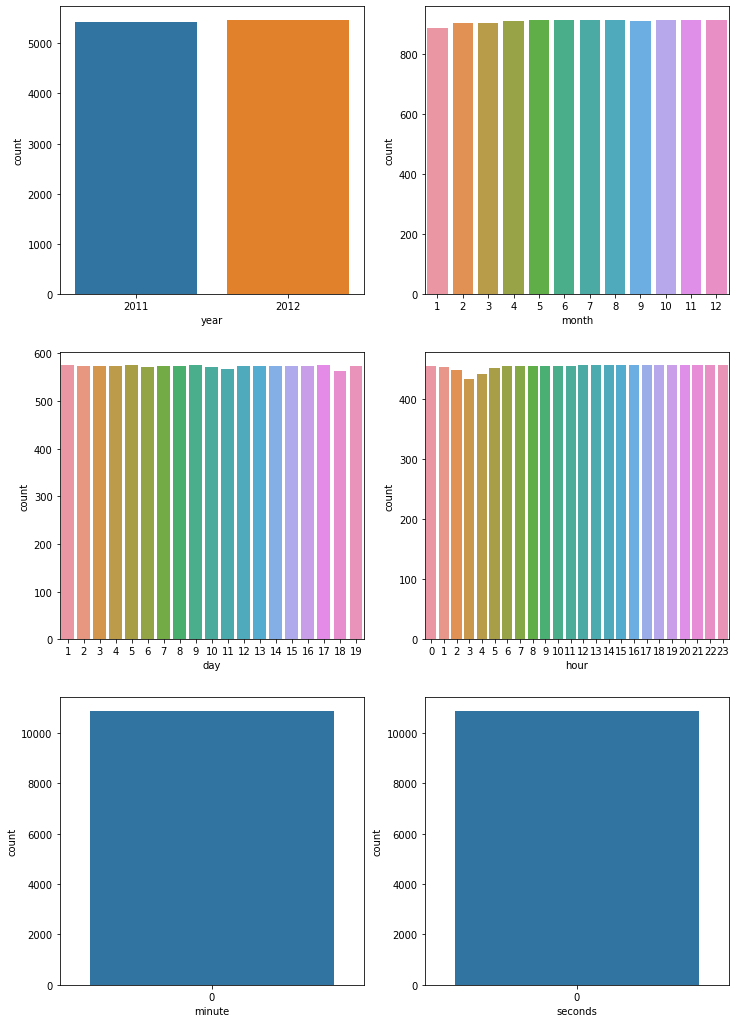

In [46]:
#연월일시분초 6가지 컬럼 1번에 시각화하기

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)

sns.countplot(data=train_b, x = "year", ax=ax1)
sns.countplot(data=train_b, x = "month", ax=ax2)
sns.countplot(data=train_b, x = "day", ax=ax3)
sns.countplot(data=train_b, x = "hour", ax=ax4)
sns.countplot(data=train_b, x = "minute", ax=ax5)
sns.countplot(data=train_b, x = "seconds", ax=ax6)

plt.show()

#분포가 고르다 정도


In [118]:
#X, y 컬럼 선택 및 train/test 데이터 분리

#데이터를 다시보자

train_b.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,seconds
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='hour', ylabel='count'>

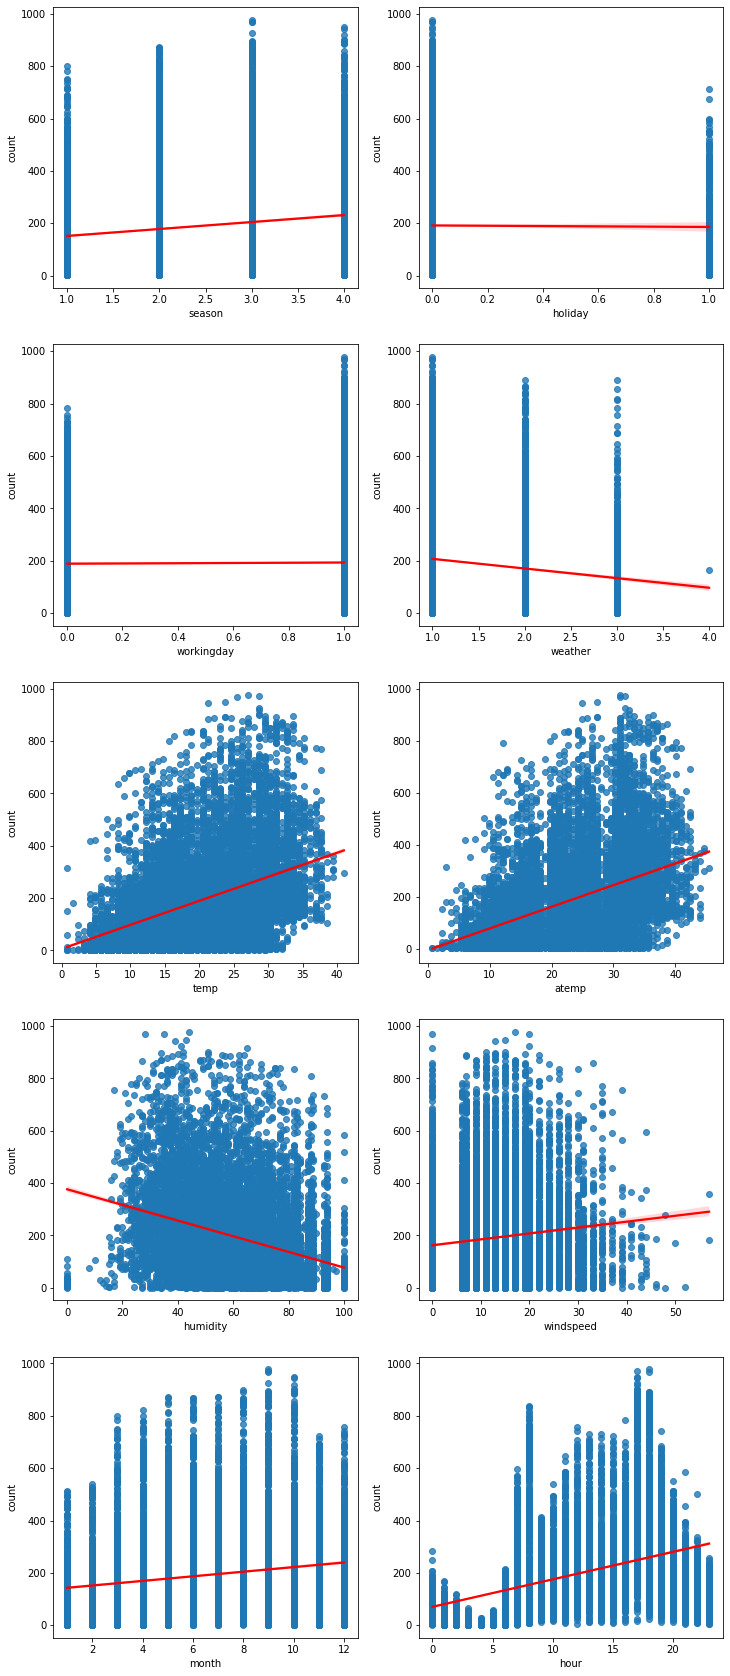

In [119]:

#casual - registered 자전거 등록현황인가, 더하면 count네요 포함관계라 상관관계분석에는 불필요할듯
#season holiday workingday 관계가 있을까
#시간별 관계가 있을까 - 날씨의 힌트가 되는 month, 활동의 기준이 되는 hour정도만 보자 나머지는 필요 없는 정보일듯

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows = 5, ncols=2)
figure.set_size_inches(12, 30)

sns.regplot(data=train_b, x = "season", y = "count", ax=ax1, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "holiday", y = "count", ax=ax2, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "workingday", y = "count", ax=ax3, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "weather", y = "count", ax=ax4, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "temp", y = "count", ax=ax5, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "atemp", y = "count", ax=ax6, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "humidity", y = "count", ax=ax7, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "windspeed", y = "count", ax=ax8, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "month", y = "count", ax=ax9, line_kws={'color':"red"})
sns.regplot(data=train_b, x = "hour", y = "count", ax=ax10, line_kws={'color':"red"})

#빨간선을 보니 대략적인 관계가 보이지만, holiday와 workingday는 버려도될듯
#heatmap으로 하면 더 잘 알수있을듯
#visualization 참고
#https://seaborn.pydata.org/generated/seaborn.regplot.html


<AxesSubplot:xlabel='hour', ylabel='count'>

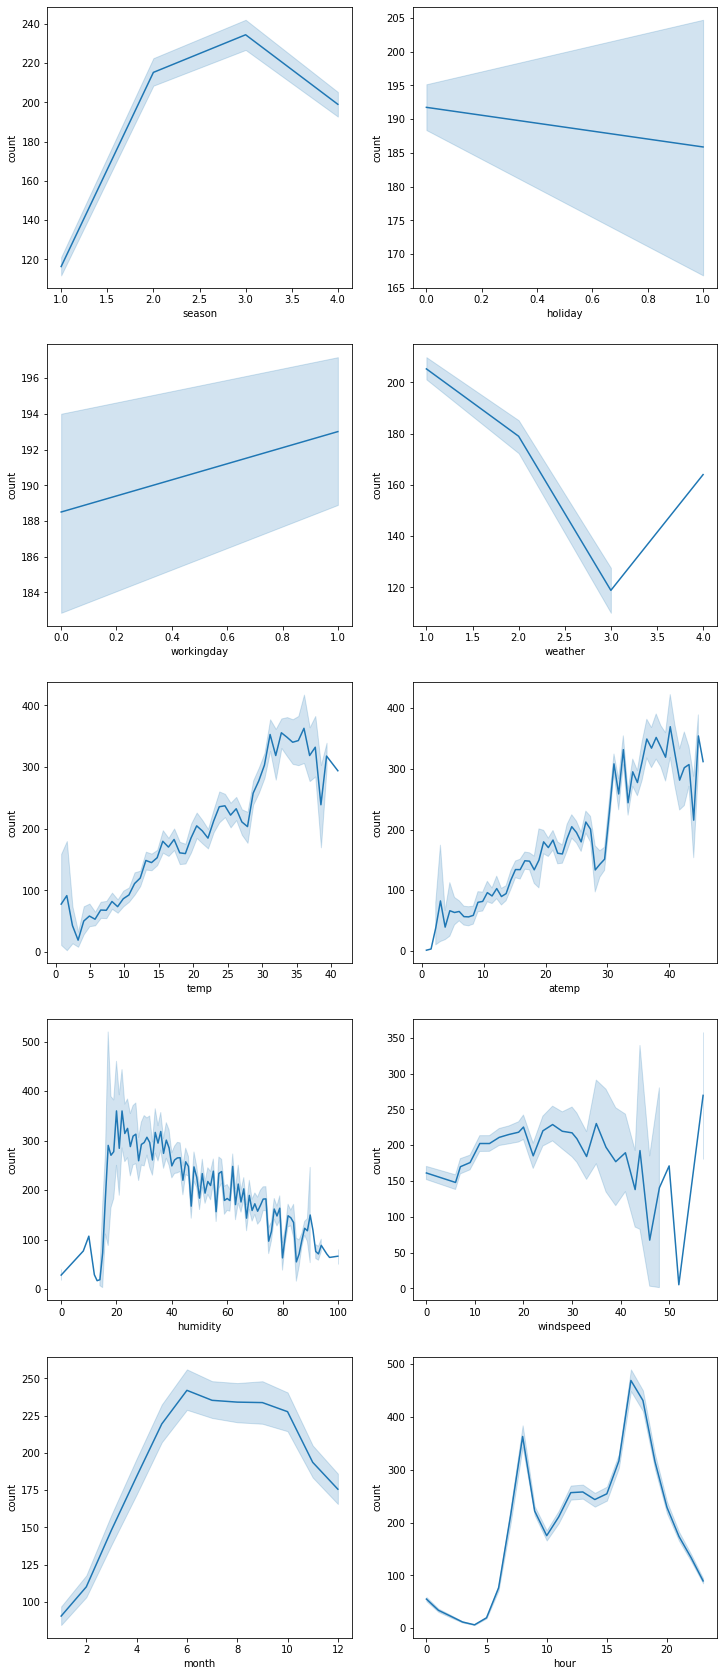

In [120]:
#위 그래프 라인플롯으로도 그려보기

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows = 5, ncols=2)
figure.set_size_inches(12, 30)

sns.lineplot(data=train_b, x = "season", y = "count", ax=ax1)
sns.lineplot(data=train_b, x = "holiday", y = "count", ax=ax2)
sns.lineplot(data=train_b, x = "workingday", y = "count", ax=ax3)
sns.lineplot(data=train_b, x = "weather", y = "count", ax=ax4)
sns.lineplot(data=train_b, x = "temp", y = "count", ax=ax5)
sns.lineplot(data=train_b, x = "atemp", y = "count", ax=ax6)
sns.lineplot(data=train_b, x = "humidity", y = "count", ax=ax7)
sns.lineplot(data=train_b, x = "windspeed", y = "count", ax=ax8)
sns.lineplot(data=train_b, x = "month", y = "count", ax=ax9)
sns.lineplot(data=train_b, x = "hour", y = "count", ax=ax10)

#상관관계를 알아보기에는 좋은 방법이 아닌듯

In [54]:
#피쳐는 이렇게 8개만 써도될듯
X2 = train_b[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour']].values
y2 = train_b['count'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(8708, 8) (8708,)
(2178, 8) (2178,)


In [55]:
#이제 깔끔하게 라이브러리로 해봅시다
model = LinearRegression()
model.fit(X2_train, y2_train)
predictions = model.predict(X2_test)
predictions

array([293.32065167,  13.24487855, 239.95433319, ..., 271.87922389,
        -6.32953219, 203.61377021])

In [57]:
#에러계산
#경축 루브릭 RMSE 150이하 달성 ㅠㅠ

mse = mean_squared_error(y2_test, predictions)
rmse = mse ** 0.5

print("Mean squared error : ", mse)
print("Root mean squared error : ", rmse)


Mean squared error :  21654.610690747308
Root mean squared error :  147.15505662649622


In [79]:
#visualization을 편하게 하기 위해 data frame으로 역변환

col = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour']
X2_test_df = pd.DataFrame(X2_test, columns=col)
X2_test_df['r_count'] = y2_test
X2_test_df['p_count'] = predictions
X2_test_df

,season,weather,temp,atemp,humidity,windspeed,month,hour,r_count,p_count
0,3.0,1.0,33.62,40.150,59.0,0.0000,7.0,11.0,127,293.320652
1,1.0,1.0,4.10,6.820,54.0,6.0032,1.0,6.0,13,13.244879
2,4.0,1.0,9.84,11.365,48.0,12.9980,12.0,18.0,163,239.954333
3,3.0,2.0,29.52,34.090,62.0,12.9980,8.0,10.0,233,254.413323
4,2.0,1.0,25.42,31.060,53.0,16.9979,6.0,23.0,222,345.081940
...,...,...,...,...,...,...,...,...,...,...
2173,2.0,3.0,23.78,27.275,49.0,19.0012,5.0,17.0,351,271.762055
2174,1.0,3.0,13.12,15.150,66.0,22.0028,1.0,4.0,2,25.468953
2175,4.0,1.0,16.40,20.455,40.0,12.9980,11.0,14.0,509,271.879224
2176,1.0,1.0,11.48,14.395,81.0,7.0015,1.0,5.0,5,-6.329532


<AxesSubplot:xlabel='atemp', ylabel='p_count'>

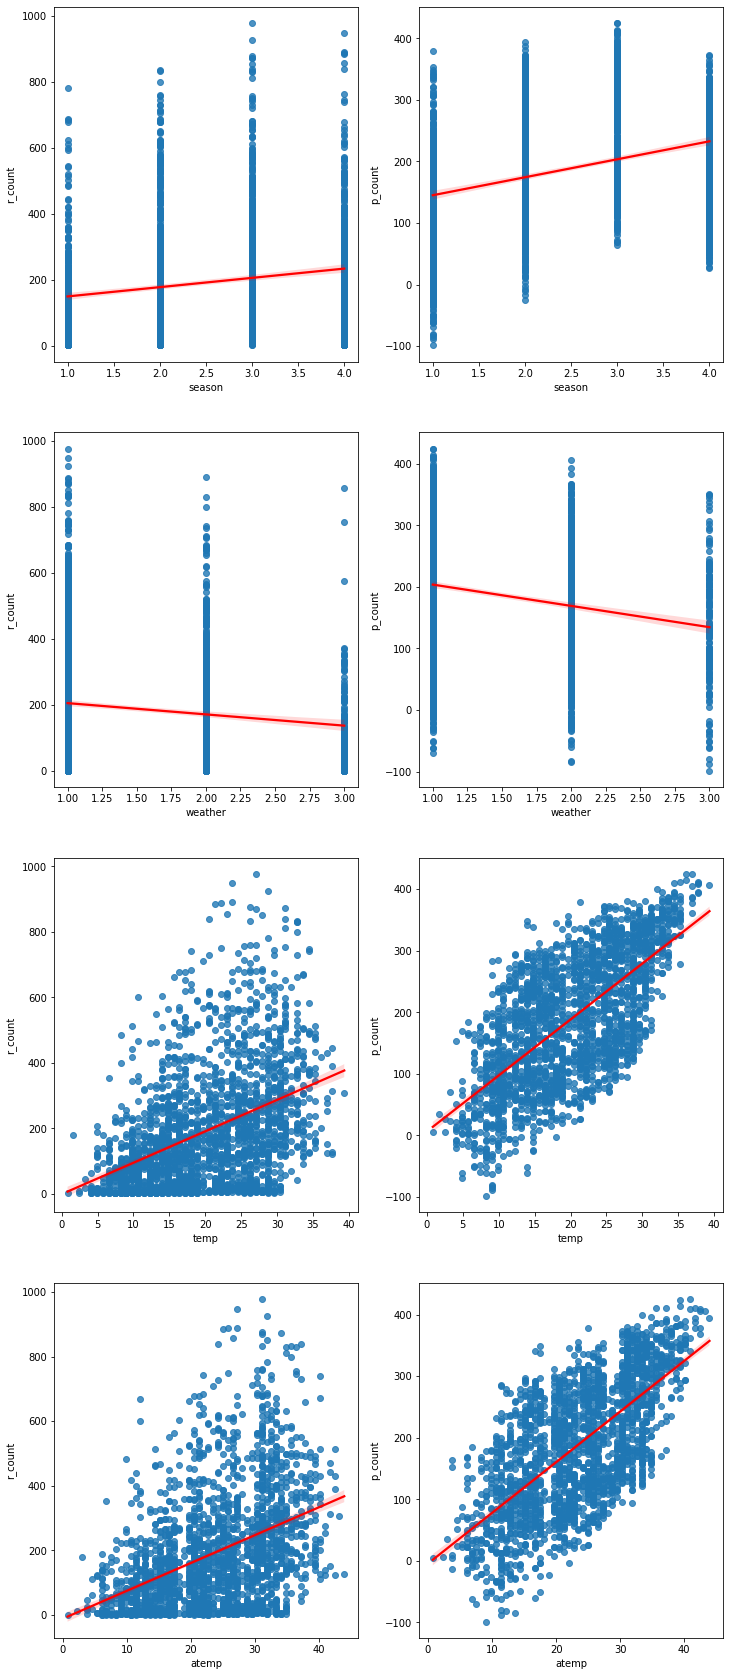

In [121]:
#x축은 각 속성, y축은 count로 시각화
#왼쪽은 r_count = real count
#오른쪽은 p_count = predicted count
#한 그래프에 그려보고싶은데 시간이 촉박해서 일단 ㅠ

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols=2)
figure.set_size_inches(12, 30)

sns.regplot(data = X2_test_df, x = 'season', y = "r_count", ax=ax1, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = 'season', y = "p_count", ax=ax2, line_kws={'color':"red"})

sns.regplot(data = X2_test_df, x = "weather", y = "r_count", ax=ax3, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = "weather", y = "p_count", ax=ax4, line_kws={'color':"red"})

sns.regplot(data = X2_test_df, x = "temp", y = "r_count", ax=ax5, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = "temp", y = "p_count", ax=ax6, line_kws={'color':"red"})

sns.regplot(data = X2_test_df, x = "atemp", y = "r_count", ax=ax7, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = "atemp", y = "p_count", ax=ax8, line_kws={'color':"red"})




<AxesSubplot:xlabel='hour', ylabel='p_count'>

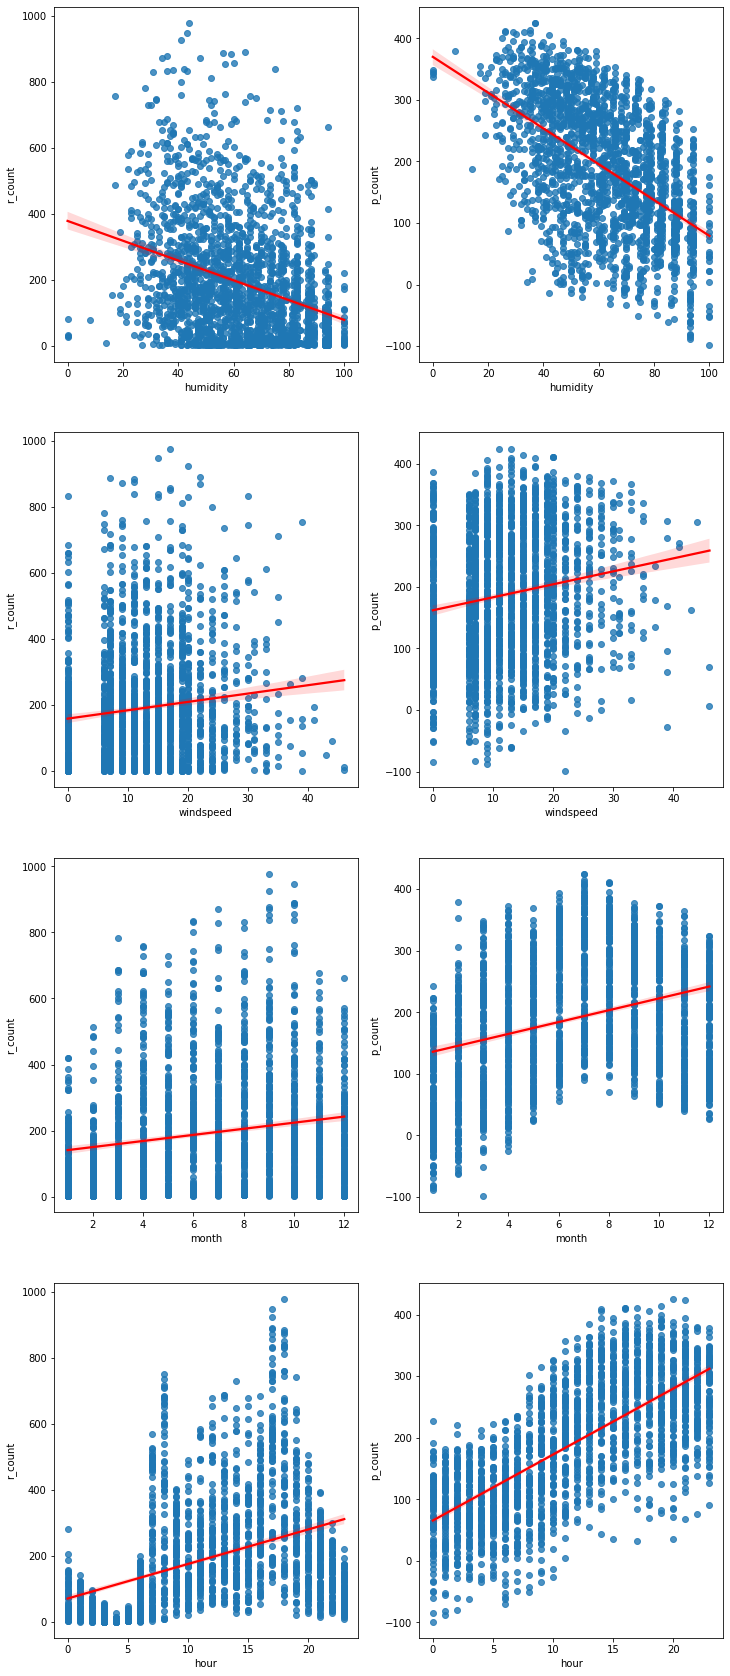

In [122]:
#x축은 각 속성, y축은 count로 시각화
#왼쪽은 r_count = real count
#오른쪽은 p_count = predicted count
#한 그래프에 그려보고싶은데 시간이 촉박해서 일단 ㅠ

figure, ((ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16)) = plt.subplots(nrows = 4, ncols=2)
figure.set_size_inches(12, 30)

sns.regplot(data = X2_test_df, x = "humidity", y = "r_count", ax=ax9, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = "humidity", y = "p_count", ax=ax10, line_kws={'color':"red"})

sns.regplot(data = X2_test_df, x = "windspeed", y = "r_count", ax=ax11, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = "windspeed", y = "p_count", ax=ax12, line_kws={'color':"red"})

sns.regplot(data = X2_test_df, x = "month", y = "r_count", ax=ax13, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = "month", y = "p_count", ax=ax14, line_kws={'color':"red"})

sns.regplot(data = X2_test_df, x = "hour", y = "r_count", ax=ax15, line_kws={'color':"red"})
sns.regplot(data = X2_test_df, x = "hour", y = "p_count", ax=ax16, line_kws={'color':"red"})

In [ ]:
#회고
#백문이불여일견! 그럼 백견이 불여일행?
#노드에서 실습했던것보다, 창의력을 발휘하면서 다양한 시도를 해보면서 더 즐겁고 재밌게 많은 스킬을 얻을 수 있었습니다
#특히, 두번째 프로젝트 진행 시, 어떠한 속성이 관계가 있을것이다 없을것이다 예측을 해보고, regplot으로 상관관계에 대한 예측을 해본것이
#앞으로의 프로젝트에 있어서도 크게 도움이 될것 같습니다

#다만, 항상 시간에 쫒기는듯하여 아쉽게도 시도를 못하는 부분
#프로젝트 2의 한 그래프에 두개의 데이터를 함께 그려보기 (GT / Prediction)
#프로젝트 1의 learning rate및 feature를 좀 더 다양하게 써보기 까지 시도를 충분히 못한 것 같아 아쉽습니다